In [40]:
import pyaudio
import wave

In [41]:
p = pyaudio.PyAudio()
for i in range(p.get_device_count()):
  dev = p.get_device_info_by_index(i)
  print((i,dev['name'],dev['maxInputChannels']))

(0, 'MacBook Pro Microphone', 1)
(1, 'MacBook Pro Speakers', 0)


In [42]:
FORMAT = pyaudio.paInt16
CHANNELS = 1
RATE = 48000
CHUNK = 1024
RECORD_SECONDS = 10
WAVE_OUTPUT_FILENAME = "file.wav"

In [43]:
audio = pyaudio.PyAudio()
  
# start Recording
stream = audio.open(
    format=FORMAT, 
    channels=CHANNELS,
    rate=RATE, 
    input=True,
    frames_per_buffer=CHUNK,
    input_device_index=0
    )
print ("recording...")
frames = []
  
for i in range(0, int(RATE / CHUNK * RECORD_SECONDS)):
    data = stream.read(CHUNK)
    frames.append(data)
print ("finished recording")
  
  
# stop Recording
stream.close()
audio.terminate()
  
waveFile = wave.open(WAVE_OUTPUT_FILENAME, 'wb')
waveFile.setnchannels(CHANNELS)
waveFile.setsampwidth(audio.get_sample_size(FORMAT))
waveFile.setframerate(RATE)
waveFile.writeframes(b''.join(frames))
waveFile.close()

recording...
finished recording


In [44]:
import IPython.display as ipd
ipd.Audio(WAVE_OUTPUT_FILENAME)

In [45]:
import matplotlib.pyplot as plt
import librosa
import librosa.display
import numpy as np

Text(0.5, 1.0, 'Audio Sample')

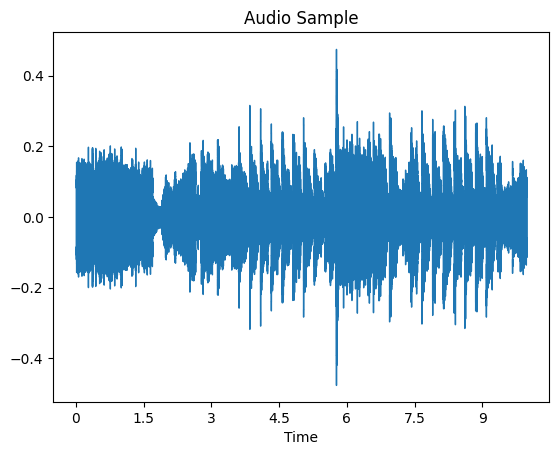

In [58]:
data, sampling_rate = librosa.load(WAVE_OUTPUT_FILENAME)
librosa.display.waveshow(data, sr=sampling_rate)
plt.title(label='Audio Sample')

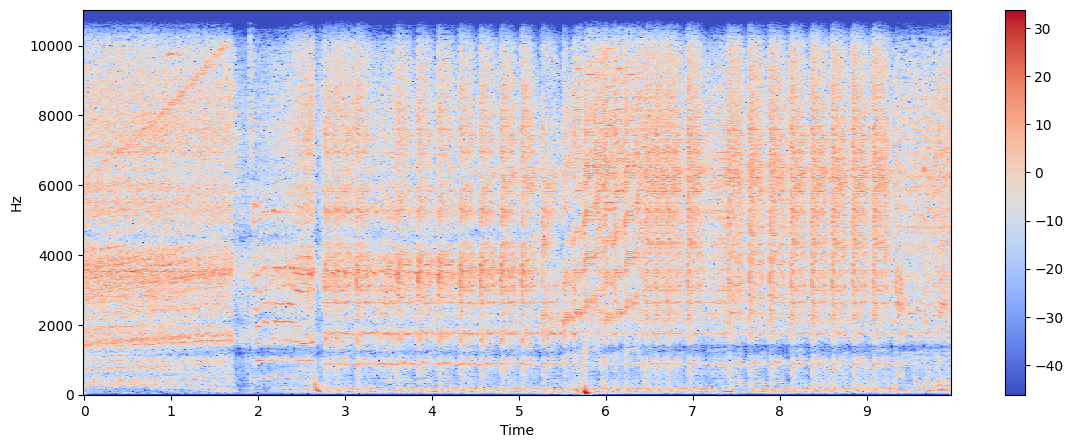

In [47]:
X = librosa.stft(data)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sampling_rate, x_axis='time', y_axis='hz')
plt.colorbar()

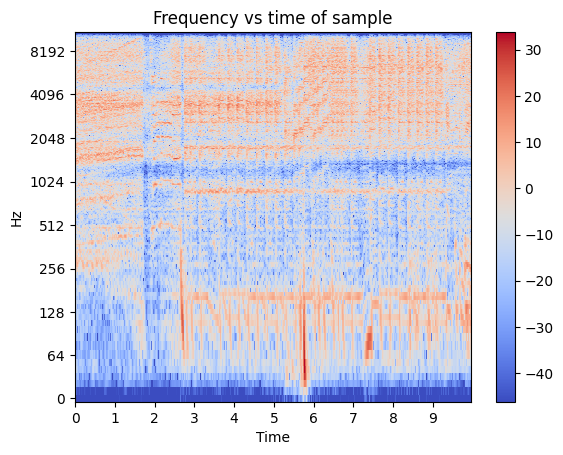

In [57]:
librosa.display.specshow(Xdb, sr=sampling_rate, x_axis='time', y_axis='log')
plt.title(label='Frequency vs time of sample')
plt.colorbar()

[Text(0.5, 1.0, 'Chromagram')]

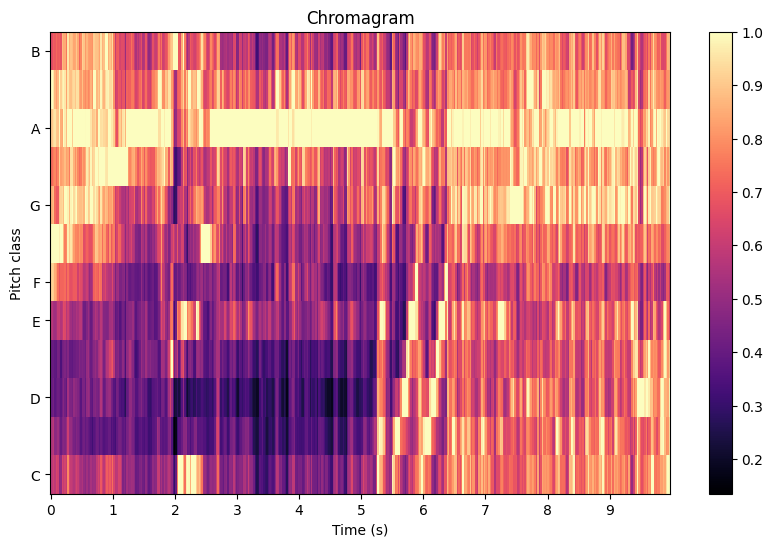

In [49]:
C = np.abs(librosa.stft(data))
chroma = librosa.feature.chroma_stft(S=C, sr=sampling_rate)
fig, ax = plt.subplots(figsize=(10,6))
img = librosa.display.specshow(chroma, y_axis='chroma', x_axis='s', ax=ax)
fig.colorbar(img, ax=ax)
ax.set(title='Chromagram')

In [56]:
print('Frequency distribution of first sample:\n', chroma[:,0])

Frequency distribution of first sample:
 [0.54619056 0.46756992 0.33441815 0.33416095 0.5359405  0.847637
 0.7989459  0.6577888  0.57126987 0.839676   1.         0.62110007]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[Text(0.5, 1.0, 'Tempogram')]

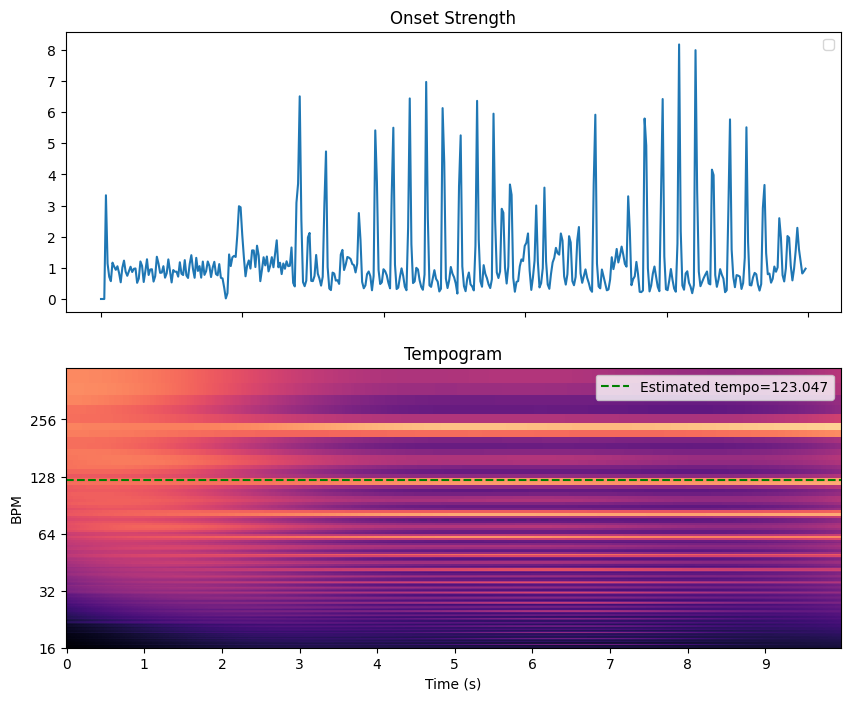

In [51]:
oenv = librosa.onset.onset_strength(y=data, sr=sampling_rate)
tempogram = librosa.feature.tempogram(onset_envelope=oenv, sr=sampling_rate)
# Compute global onset autocorrelation
ac_global = librosa.autocorrelate(oenv, max_size=tempogram.shape[0])
ac_global = librosa.util.normalize(ac_global)
# Estimate the global tempo for display purposes
tempo = librosa.beat.tempo(onset_envelope=oenv, sr=sampling_rate)[0]
fig, ax = plt.subplots(nrows=2, figsize=(10, 8))
times = librosa.times_like(oenv, sr=sampling_rate)
ax[0].plot(times, oenv)
ax[0].label_outer()
ax[0].legend(frameon=True)
ax[0].set(title='Onset Strength')
librosa.display.specshow(tempogram, sr=sampling_rate,x_axis='s', 
     y_axis='tempo', cmap='magma',ax=ax[1])
ax[1].axhline(tempo, color='g', linestyle='--', alpha=1,
            label='Estimated tempo={:g}'.format(tempo))
ax[1].legend(loc='upper right')
ax[1].set(title='Tempogram')